In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model 

In [4]:
ratings = pd.read_csv("https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/movielens/ratings.csv" )


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
ratings.shape

(100004, 4)

In [9]:
users= len(ratings.userId.unique())
movies = len(ratings.movieId.unique())
print(users, movies)

671 9066


In [11]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [12]:
movieId_2_seqId = {}
seqId_2_movieId= {}
for sId, id in enumerate(ratings["movieId"].unique()):
  seqId_2_movieId[sId] = id
  movieId_2_seqId[id] = sId

In [13]:
def return_movieId_2_seq(row):
  return movieId_2_seqId[row.movieId]

ratings["new_movieId"] =ratings.apply(return_movieId_2_seq, axis=1)

In [14]:
ratings.describe()

,userId,movieId,rating,timestamp,new_movieId
count,100004.000000,100004.000000,100004.000000,1.000040e+05,100004.000000
mean,347.011310,12548.664363,3.543608,1.129639e+09,1660.778349
std,195.163838,26369.198969,1.058064,1.916858e+08,1893.955817
min,1.000000,1.000000,0.500000,7.896520e+08,0.000000
25%,182.000000,1028.000000,3.000000,9.658478e+08,327.000000
50%,367.000000,2406.500000,4.000000,1.110422e+09,873.000000
75%,520.000000,5418.000000,4.000000,1.296192e+09,2344.000000
max,671.000000,163949.000000,5.000000,1.476641e+09,9065.000000


In [15]:
from sklearn.model_selection import train_test_split
trn, tst = train_test_split(ratings, test_size=0.2, random_state = 42)

In [17]:
trn.head()

,userId,movieId,rating,timestamp,new_movieId
37865,273,5816,4.5,1466946328,364
46342,339,2028,4.5,1446663181,113
64614,461,3895,0.5,1093224965,4626
41974,300,3578,4.5,1086010878,468
50236,369,292,3.0,847465462,48


In [18]:
tst.head()

,userId,movieId,rating,timestamp,new_movieId
19090,128,1028,5.0,1049690908,165
99678,665,4736,1.0,1010197684,9064
18455,120,4002,3.0,1167420604,2763
35755,257,1274,4.0,1348544094,2190
66536,468,6440,4.0,1296191715,1333


In [43]:
"""영화 레이어"""
movie_input= Input(shape=[1], name="Movies")
#Embedding(input_dim, output_dim)
# - input_dim: # of movie
# - output_dim: dimension of output embedding layer

movie_embedding= Embedding(movies+1, 5, name= "Embedded_Movies")(movie_input)
movie_final= Flatten(name='Flatten_Movies')(movie_embedding)

In [44]:
"""사용자 레이어"""
user_input= Input(shape=[1], name="Users")
user_embedding= Embedding(users+1, 5, name= "Embedded_Users")(user_input)
user_final= Flatten(name='Flatten_Users')(user_embedding)

In [55]:
from keras.layers import Dot
# """내적 레이어"""
DP = Dot(name='Dot_Product', axes=1)([movie_final,user_final])


In [56]:
from keras.losses import mean_squared_error
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(mean_squared_error(y_true, y_pred))

model = Model([movie_input, user_input], DP)
model.compile(optimizer='adam', loss= root_mean_squared_error)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movies (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Users (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 Embedded_Movies (Embedding)    (None, 1, 5)         45335       ['Movies[0][0]']                 
                                                                                                  
 Embedded_Users (Embedding)     (None, 1, 5)         3360        ['Users[0][0]']                  
                                                                                              

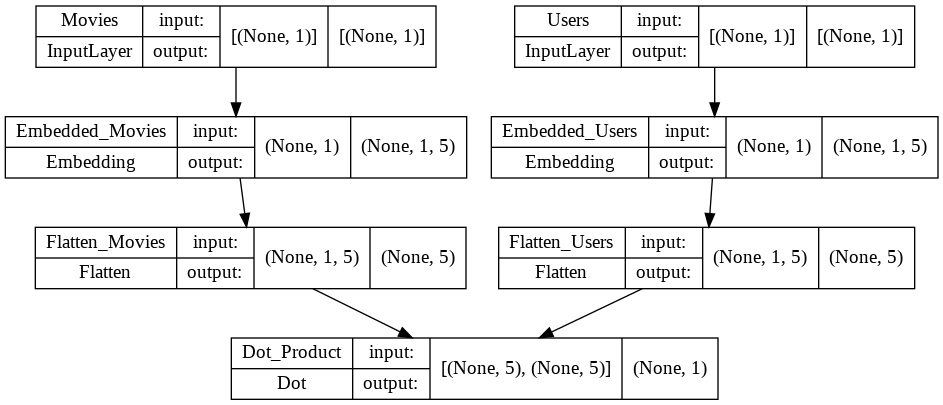

In [57]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names= True)

Epoch 1/10
2501/2501 [==============================] - 8s 3ms/step - loss: 3.3284
Epoch 2/10
2501/2501 [==============================] - 7s 3ms/step - loss: 1.9236
Epoch 3/10
2501/2501 [==============================] - 7s 3ms/step - loss: 1.2589
Epoch 4/10
2501/2501 [==============================] - 9s 4ms/step - loss: 0.9956
Epoch 5/10
2501/2501 [==============================] - 6s 3ms/step - loss: 0.8704
Epoch 6/10
2501/2501 [==============================] - 4s 2ms/step - loss: 0.8015
Epoch 7/10
2501/2501 [==============================] - 5s 2ms/step - loss: 0.7589
Epoch 8/10
2501/2501 [==============================] - 6s 2ms/step - loss: 0.7296
Epoch 9/10
2501/2501 [==============================] - 8s 3ms/step - loss: 0.7084
Epoch 10/10
2501/2501 [==============================] - 7s 3ms/step - loss: 0.6925


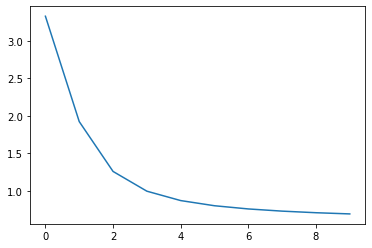

In [58]:
from keras.models import load_model
history = model.fit([trn.new_movieId, trn.userId], trn.rating, epochs=10, verbose=1)
model.save(r'recommender_model.h5')
plt.plot(history.history['loss'])
plt.xlabel=('Epochs')
plt.ylabel = ('Training Error')


In [59]:
model.evaluate([tst.new_movieId, tst.userId], tst.rating)

626/626 [==============================] - 1s 2ms/step - loss: 0.8120


0.8120194673538208

In [60]:
predictions =model.predict([tst.new_movieId.head(8), tst.userId.head(8)])

In [61]:
print(predictions)

[[4.820474  ]
 [0.07883641]
 [3.508121  ]
 [3.6438582 ]
 [3.195691  ]
 [4.07206   ]
 [3.5027921 ]
 [0.01994797]]


In [62]:
for i in range(0,8):
  print(predictions[i], tst.rating.iloc[i])

[4.820474] 5.0
[0.07883641] 1.0
[3.508121] 3.0
[3.6438582] 4.0
[3.195691] 4.0
[4.07206] 5.0
[3.5027921] 5.0
[0.01994797] 4.0
